In [36]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 2: Load processed dataset
df = pd.read_csv('../data/processed/cart_churn_dataset.csv')



In [37]:
feature_cols = ['view_count', 'time_to_cart', 'price', 'cart_dayofweek', 'cart_hour']
X = df[feature_cols]
y = df['churned']



In [39]:
X = df[feature_cols].copy()
X['time_to_cart'] = X['time_to_cart'].fillna(X['time_to_cart'].median())


In [40]:
# Fill NaNs BEFORE the split!
X['time_to_cart'] = X['time_to_cart'].fillna(X['time_to_cart'].median())



In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [43]:
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict churn labels
y_pred = logreg.predict(X_test)

# Predict churn probabilities (for ROC)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.38      0.49    347438
           1       0.59      0.83      0.69    369511

    accuracy                           0.62    716949
   macro avg       0.64      0.61      0.59    716949
weighted avg       0.64      0.62      0.59    716949

📊 Confusion Matrix:
[[133439 213999]
 [ 61160 308351]]
📈 ROC-AUC Score: 0.637054644603892


In [45]:
import pandas as pd

# Get model coefficients
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

# Sort by magnitude
coefs = coefs.sort_values(by='Coefficient', ascending=False)
print("Churn Drivers:")
print(coefs)


🧠 Churn Drivers:
          Feature  Coefficient
3  cart_dayofweek     0.033537
4       cart_hour     0.003912
1    time_to_cart     0.000005
2           price    -0.000182
0      view_count    -0.025045


C:\Users\bhuva\smart-retail-analytics\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


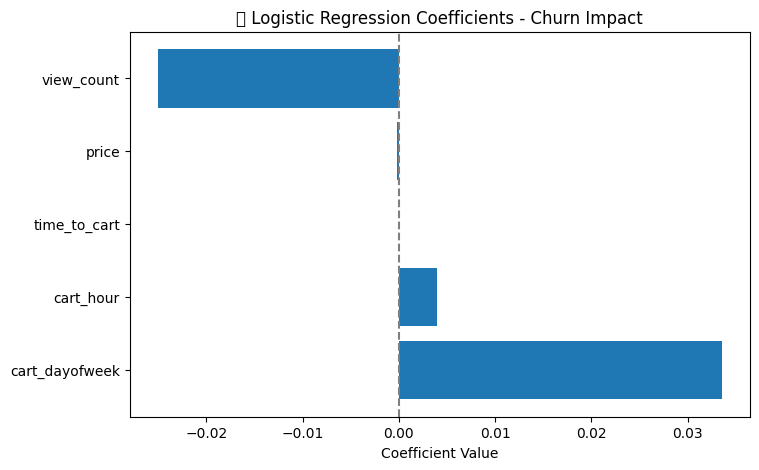

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(coefs['Feature'], coefs['Coefficient'])
plt.title('Logistic Regression Coefficients - Churn Impact')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Coefficient Value')
plt.show()


In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


🌲 Random Forest Performance:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79    347438
           1       0.80      0.80      0.80    369511

    accuracy                           0.79    716949
   macro avg       0.79      0.79      0.79    716949
weighted avg       0.79      0.79      0.79    716949

Confusion Matrix:
 [[273803  73635]
 [ 73564 295947]]
ROC-AUC: 0.8870362206309033


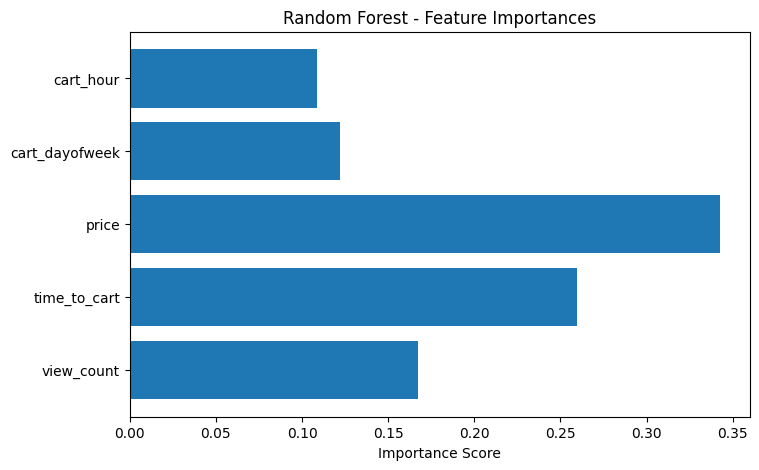

In [48]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.title("Random Forest - Feature Importances")
plt.xlabel("Importance Score")
plt.show()
